In [1]:
#Import
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
matplotlib.rcParams.update({'xtick.direction': 'in', 'ytick.direction': 'in',
                            'axes.linewidth': 1.5, })

In [2]:
#Load data
all_tweets = pd.read_json("random_tweets.json", lines=True)

print(len(all_tweets))
print(all_tweets.columns.sort_values(ascending=True))
print(all_tweets.loc[0]['text'])
print(all_tweets.loc[0]['user']['location'])
print(all_tweets.loc[0]['user'])
keys = list(all_tweets['user'][0].keys())
print(keys)
#print(all_tweets['description'])

11099
Index(['contributors', 'coordinates', 'created_at', 'entities',
       'extended_entities', 'favorite_count', 'favorited', 'geo', 'id',
       'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'metadata',
       'place', 'possibly_sensitive', 'quoted_status', 'quoted_status_id',
       'quoted_status_id_str', 'retweet_count', 'retweeted',
       'retweeted_status', 'source', 'text', 'truncated', 'user',
       'withheld_in_countries'],
      dtype='object')
RT @KWWLStormTrack7: We are more than a month into summer but the days are getting shorter. The sunrise is about 25 minutes later on July 3…
Waterloo, Iowa
{'id': 145388018, 'id_str': '145388018', 'name': 'Derek Wolkenhauer', 'screen_name': 'derekw221', 'location': 'Waterloo, Iowa', 'description': '', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 21

In [3]:
#Defining viral tweets
import numpy as np

median_retweets = all_tweets['retweet_count'].median()
print('median: ', median_retweets)
all_tweets['is_viral'] = np.where(all_tweets['retweet_count'] >= median_retweets, 1, 0)
print(all_tweets['is_viral'].value_counts())

median:  13.0
1    5591
0    5508
Name: is_viral, dtype: int64


In [4]:
#Features
all_tweets['tweet_length'] = all_tweets.apply(lambda tweet: len(tweet['text']), axis=1)
all_tweets['followers_count'] = all_tweets.apply(lambda tweet: tweet['user']['followers_count'], axis=1)
all_tweets['friends_count'] = all_tweets.apply(lambda tweet: tweet['user']['friends_count'], axis=1)
all_tweets['listed_count'] = all_tweets.apply(lambda tweet: tweet['user']['listed_count'], axis=1)
all_tweets['favourites_count'] = all_tweets.apply(lambda tweet: tweet['user']['favourites_count'], axis=1)
all_tweets['statuses_count'] = all_tweets.apply(lambda tweet: tweet['user']['statuses_count'], axis=1)
all_tweets['description_length'] = all_tweets.apply(lambda tweet: len(tweet['user']['description']), axis=1)

In [5]:
#Normalizing
from sklearn.preprocessing import scale

labels = all_tweets['is_viral']
data = all_tweets[['tweet_length',
                   'followers_count',
                   'friends_count', 
]]
scaled_data = scale(data, axis=0)
print(scaled_data)

"""
                   'listed_count', 
                   'favourites_count',
                   'statuses_count',
                   'description_length'"""

[[ 0.6164054  -0.02878298 -0.14483305]
 [-1.64577622 -0.02886246 -0.16209787]
 [ 0.6164054  -0.02887736 -0.11566596]
 ...
 [ 0.6164054  -0.02918038 -0.1768776 ]
 [ 0.6164054  -0.02955792 -0.14679496]
 [-1.71759151 -0.02208668  0.0333085 ]]


"\n                   'listed_count', \n                   'favourites_count',\n                   'statuses_count',\n                   'description_length'"

In [6]:
data = all_tweets[['tweet_length',
                   'followers_count',
                   'friends_count', 
                   'listed_count', 
                   'favourites_count',
                   'statuses_count',
                   'description_length',
                   'is_viral']] 
data.corr()

,tweet_length,followers_count,friends_count,listed_count,favourites_count,statuses_count,description_length,is_viral
tweet_length,1.000000,0.007666,0.030084,0.025148,0.070186,0.004468,0.110436,0.225782
followers_count,0.007666,1.000000,0.059670,0.135102,-0.001710,0.044369,0.008904,-0.020026
friends_count,0.030084,0.059670,1.000000,0.192920,0.091460,0.227707,0.109579,-0.015817
listed_count,0.025148,0.135102,0.192920,1.000000,0.103168,0.279984,0.135239,-0.080671
favourites_count,0.070186,-0.001710,0.091460,0.103168,1.000000,0.356647,0.106308,0.103468
statuses_count,0.004468,0.044369,0.227707,0.279984,0.356647,1.000000,0.112763,-0.002240
description_length,0.110436,0.008904,0.109579,0.135239,0.106308,0.112763,1.000000,-0.150608
is_viral,0.225782,-0.020026,-0.015817,-0.080671,0.103468,-0.002240,-0.150608,1.000000


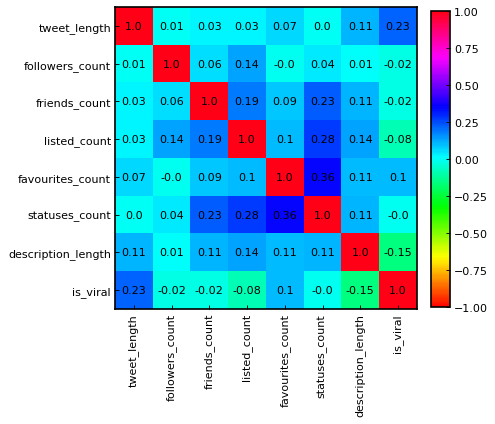

In [7]:
A = data.corr()
fig = plt.figure(figsize=(8, 5), dpi=80)
ax = fig.add_subplot()
plt.subplots_adjust(right=0.8)
cax = fig.add_axes([0.72, 0.13, 0.03, 0.74])

im = ax.imshow(A, cmap='hsv', vmin=-1, vmax=1)
ax.set_xticks(range(len(A.columns)))
ax.set_xticklabels(A.columns)
ax.set_yticks(range(len(A.columns)))
ax.set_yticklabels(A.columns)
ax.tick_params(axis='x', rotation=90)
fig.colorbar(im, cax=cax, orientation='vertical')
for i in range(len(A)):
    for j in range(len(A)):
        text = ax.text(j, i, round(A.iloc[i, j],2),
                       ha="center", va="center", color="k")
plt.show()

In [8]:
#Normalizing
from sklearn.preprocessing import scale

labels = all_tweets['is_viral']
data = all_tweets[['tweet_length',
                   'followers_count',
                   'friends_count', 
]]
scaled_data = scale(data, axis=0)
print(scaled_data)

[[ 0.6164054  -0.02878298 -0.14483305]
 [-1.64577622 -0.02886246 -0.16209787]
 [ 0.6164054  -0.02887736 -0.11566596]
 ...
 [ 0.6164054  -0.02918038 -0.1768776 ]
 [ 0.6164054  -0.02955792 -0.14679496]
 [-1.71759151 -0.02208668  0.0333085 ]]


"\n                   'listed_count', \n                   'favourites_count',\n                   'statuses_count',\n                   'description_length'"

In [9]:
#Training & test data
from sklearn.model_selection import train_test_split

train_data, test_data, train_labels, test_labels = train_test_split(
    scaled_data, 
    labels, 
    test_size = 0.2, 
    random_state = 1)

In [10]:
#Classifier
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(train_data, train_labels)
print(classifier.score(test_data, test_labels))

0.5905405405405405


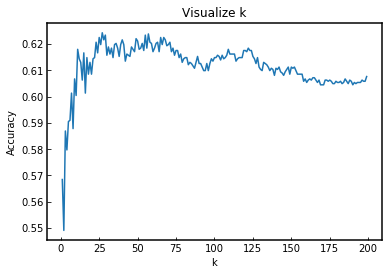

In [11]:
#Visualize k
scores = []
for k in range(1, 200):
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(train_data, train_labels)
    scores.append(classifier.score(test_data, test_labels))
    
plt.plot(range(1,200), scores)
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("Visualize k")
plt.show()

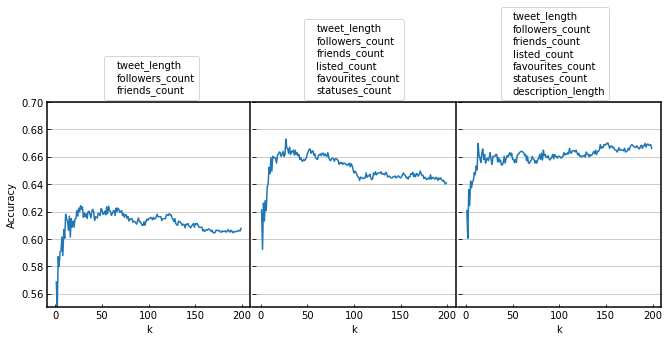

In [87]:
#Comparison of feature combination
fig = plt.figure(figsize=(11, 6))
ax0 = fig.add_subplot(131)
ax1 = fig.add_subplot(132)
ax2 = fig.add_subplot(133)
n = 200
lx = 0.
xlim = [.55,.7]
#0
labels = all_tweets['is_viral']
features = ['tweet_length','followers_count','friends_count']
data = all_tweets[features]
scaled_data = scale(data, axis=0)
train_data, test_data, train_labels, test_labels = train_test_split(scaled_data,labels, 
    test_size = 0.2, random_state = 1)
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(train_data, train_labels)
scores = []
for k in range(1, n):
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(train_data, train_labels)
    scores.append(classifier.score(test_data, test_labels))
ax0.plot(range(1,n), scores, label='tweet_length\nfollowers_count\nfriends_count')
ax0.set_xlabel("k")
ax0.set_ylabel("Accuracy")
ax0.grid(axis='y', alpha=0.8)
ax0.set_ylim(xlim)
ax0.legend(handlelength=0, bbox_to_anchor=(0.77, 1.25))

#1
#Normalizing
labels = all_tweets['is_viral']
features= ['tweet_length','followers_count','friends_count', 'listed_count',
                   'favourites_count', 'statuses_count']
data = all_tweets[features]
scaled_data = scale(data, axis=0)
#Training & test data
train_data, test_data, train_labels, test_labels = train_test_split(scaled_data,labels, 
    test_size = 0.2, random_state = 1)
#Classifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(train_data, train_labels)
#Visualize k
scores = []
for k in range(1, n):
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(train_data, train_labels)
    scores.append(classifier.score(test_data, test_labels))
ax1.plot(range(1,n), scores, label='tweet_length\nfollowers_count\nfriends_count\nlisted_count\nfavourites_count\nstatuses_count')
ax1.set_xlabel("k")
ax1.axes.yaxis.set_ticklabels([])
ax1.spines['left'].set_visible(False)
ax1.grid(axis='y', alpha=0.8)
ax1.set_ylim(xlim)
ax1.legend(handlelength=0, bbox_to_anchor=(0.77, 1.43))

#2
labels = all_tweets['is_viral']
features = ['tweet_length','followers_count','friends_count', 'listed_count',
                   'favourites_count', 'statuses_count', 'description_length']
data = all_tweets[features]
scaled_data = scale(data, axis=0)
train_data, test_data, train_labels, test_labels = train_test_split(scaled_data,labels, 
    test_size = 0.2, random_state = 1)
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(train_data, train_labels)
scores = []
for k in range(1, n):
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(train_data, train_labels)
    scores.append(classifier.score(test_data, test_labels))
ax2.plot(range(1,n), scores, label='tweet_length\nfollowers_count\nfriends_count\nlisted_count\nfavourites_count\nstatuses_count\ndescription_length')
ax2.set_xlabel("k")
ax2.axes.yaxis.set_ticklabels([])
ax2.spines['left'].set_visible(False)
ax2.grid(axis='y', alpha=0.8)
ax2.set_ylim(xlim)
ax2.legend(handlelength=0, bbox_to_anchor=(0.77, 1.49))#1.25


plt.subplots_adjust(wspace=0.01, top= 0.6)